In [4]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import LabelEncoder 

import joblib

In [7]:
file_path = "D:\powerbi\prediction_data.xlsx"
sheet_name = 'vw_ChurnData'
data = pd.read_excel(file_path, sheet_name=sheet_name)
print(data.head())

  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   12052-PUN  Female   33      No          Punjab                   11   
1   12069-UTT  Female   30     Yes   Uttar Pradesh                   10   
2   12079-MAH  Female   73     Yes     Maharashtra                    2   
3   12112-MAD  Female   27      No  Madhya Pradesh                   14   
4   12118-TAM  Female   23      No      Tamil Nadu                    7   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                31       None           Yes            Yes  ...   
1                14     Deal 4           Yes             No  ...   
2                 4       None           Yes             No  ...   
3                 4     Deal 5           Yes             No  ...   
4                 3     Deal 2           Yes            Yes  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal     115.000000   7396.149902           0.0   
1  Bank Wi

In [8]:
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)
columns_to_encode = [

    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',

    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',

    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',

    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',

    'Payment_Method'

]
label_encoders = {}

for column in columns_to_encode:

    label_encoders[column] = LabelEncoder()

    data[column] = label_encoders[column].fit_transform(data[column])

data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

X = data.drop('Customer_Status', axis=1)

y = data['Customer_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Confusion Matrix:
[[800  40]
 [136 226]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       840
           1       0.85      0.62      0.72       362

    accuracy                           0.85      1202
   macro avg       0.85      0.79      0.81      1202
weighted avg       0.85      0.85      0.85      1202



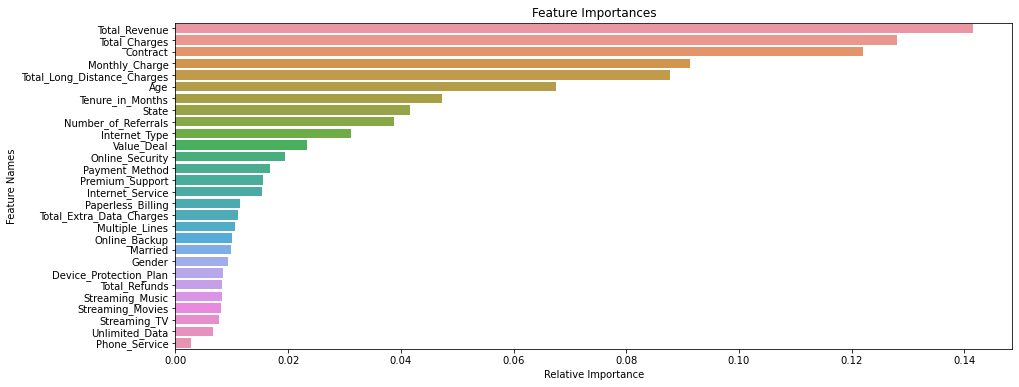

In [10]:
y_pred = rf_model.predict(X_test)

print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")

print(classification_report(y_test, y_pred))

 
importances = rf_model.feature_importances_

indices = np.argsort(importances)[::-1]

 
plt.figure(figsize=(15, 6))

sns.barplot(x=importances[indices], y=X.columns[indices])

plt.title('Feature Importances')

plt.xlabel('Relative Importance')

plt.ylabel('Feature Names')

plt.show()

In [11]:
# Define the path to the Joiner Data Excel file
file_path = "D:\powerbi\prediction_data.xlsx"

# Define the sheet name to read data from
sheet_name = 'vw_JoinData'

# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the fetched data
print(new_data.head())

# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']

# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

# Make predictions
new_predictions = rf_model.predict(new_data)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save the results
original_data.to_csv(r"D:\powerbi\Prediction.csv", index=False)

  Customer_ID  Gender  Age Married          State  Number_of_Referrals  \
0   12056-WES    Male   27      No    West Bengal                    2   
1   12136-RAJ  Female   25     Yes      Rajasthan                    2   
2   12257-ASS  Female   39      No          Assam                    9   
3   15349-UTT    Male   47     Yes  Uttar Pradesh                    9   
4   21956-JHA  Female   59     Yes      Jharkhand                   10   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                20       None           Yes             No  ...   
1                35       None           Yes             No  ...   
2                 1       None           Yes             No  ...   
3                12     Deal 5           Yes            Yes  ...   
4                 8       None           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      90.400002    268.450012           0.0   
1  Bank Withdraw